In [354]:
from pysolar.solar import *
import matplotlib.pyplot as plt
def get_dates(year,hour,minute,delta):
    months = list(range(1,13))
    days = list(range(1,30,15))
    dates = []
    for m in months:
        for d in days:
            dates.append(datetime.datetime(year,m,d,hour,minute,tzinfo=datetime.timezone.utc(delta)))
    return dates
def seasons(year,hour,minute,delta):
    # only for 2018
    dates = []
    m = [3,6,9,12]
    d = [20,21,23,21]
    for i in range(0,4):
        dates.append(datetime.datetime(year,m[i],d[i],hour,minute,tzinfo=datetime.timezone.utc(delta)))
    return dates
def max_day_alt(alt):
    return alt.index(max(alt))
def format_datetime(d):
    return str(d).split(' ').pop(0)
def solar_alt_azi(lat,lon,year=2019,hour=12,minute=0,delta=0):
    dates = get_dates(year,hour,minute,delta)
    alt,azi = [],[]
    for d in dates:
        alt.append(get_altitude(lat,lon,d))
        azi.append(get_azimuth(lat,lon,d))
    return alt,azi,dates
def solar_alt_azi_seasons(lat,lon,year,hour,minute,delta=0):
    dates = seasons(year,hour,minute,delta)
    alt,azi = [],[]
    for d in dates:
        alt.append(get_altitude(lat,lon,d))
        azi.append(get_azimuth(lat,lon,d))
    return alt,azi,dates

In [355]:
def plot_analemma(alt,azi,figsize=7, \
                  label_coord=True,label_seasons=True, label_card=True, \
                 sky_color='#b9e3f3', sun_color = '#FDB813' ):
    
    
    f, ax = plt.subplots(1,1,figsize=(figsize,figsize))
    width = 20000000
    m = Basemap(width=width,height=width,projection='aeqd',
                lat_0=90,lon_0=180,celestial=True,resolution='f',ax=ax)

    m.drawmapboundary(fill_color=sky_color)
    m.drawparallels(np.arange(0,91, 10),color='gray',dashes=[1,3])
    coord_labs = [1,1,1,1]
    if label_coord==False: coord_labs = [0,0,0,0] 
    m.drawmeridians(np.arange(-180,180,10),color='gray',dashes=[1,3],labels=coord_labs)
    
    xpt,ypt = m(azi,alt)
    m.plot(xpt,ypt,'ko',color=sun_color,markeredgecolor='k',markersize=12)
    if label_card == True:
        ax.annotate('N', xy=(0.48, 0.95), xycoords='axes fraction',weight='bold',fontsize=18)
        ax.annotate('E', xy=(0.95, 0.485), xycoords='axes fraction',weight='bold',fontsize=18)
        ax.annotate('W', xy=(0.01, 0.485), xycoords='axes fraction',weight='bold',fontsize=18)
        ax.annotate('S', xy=(0.485, 0.01), xycoords='axes fraction',weight='bold',fontsize=18)

    return f,ax,m

def plot_season(alt,azi,dates,ax,basemap, \
                sun_color = '#FDB813',label_dates=True):
    labs = ['Mar. Equinox', 'Jun. Solstice', 'Sep. Equinox', 'Dec. Solstice']
    offs = [1,1,-1,-1]
    xoff = [5,1,42,1]
    yoff = [1,10,1,20]
    xpt,ypt = basemap(azi,alt)
    basemap.plot(xpt,ypt,'ko',color=sun_color,markeredgecolor='k',markersize=12,zorder=0)
    if label_dates==True:
        for i, (x,y) in enumerate(zip(xpt,ypt)):
            ax.annotate(labs[i], (x,y), \
                        xytext=(2*offs[i]*xoff[i],1*yoff[i]*offs[i]),\
                        textcoords='offset points', weight='bold')
    return f 

def analemma(lat,lon=0,year=2018,hour=12,minute=0,delta=0, \
             savefig=None,plot_seasons=True,):
    
    alt,azi,dates = solar_alt_azi(lat,lon,year,hour,minute,delta)
    f, ax, m = plot_analemma(alt,azi)
    salt,sazi,sdates = solar_alt_azi_seasons(lat,lon,year,hour,minute,delta)
    if plot_seasons==True:
        f = plot_season(salt,sazi,sdates,ax,m)
    
    f.tight_layout()
    
    if savefig!=None:
        f.savefig(savefig,bbox_inches='tight')
    

analemma(23,savefig='lat23.png')





TypeError: 'datetime.timezone' object is not callable

(0, 95)

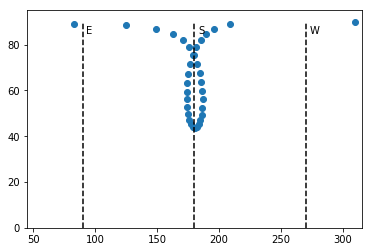

In [9]:
sd_lat, sd_lon = 23, 0
alt,azi,dates = solar_alt_azi(sd_lat,sd_lon,2019,12)

plt.scatter(azi,alt)
#plt.vlines(x=0,ymin=0,ymax=90,linestyles='--')
plt.vlines(x=90,ymin=0,ymax=90,linestyles='--')
plt.vlines(x=180,ymin=0,ymax=90,linestyles='--')
plt.vlines(x=270,ymin=0,ymax=90,linestyles='--')

#plt.text(x=0+3,y=85,s='N')
plt.text(x=90+3,y=85,s='E')
plt.text(x=180+3,y=85,s='S')
plt.text(x=270+3,y=85,s='W')

plt.xlim(45,270+45)
plt.ylim(0,95)

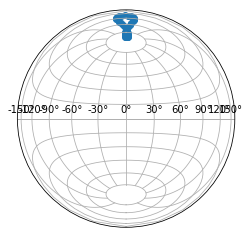

In [6]:
import math
sd_lat, sd_lon = 30, 0
alt,azi,dates = solar_alt_azi(sd_lat,sd_lon,2019,12)


r_alt = [math.radians(x) for x in alt]
r_azi = [math.radians(x) for x in azi]

ax = plt.subplot(111, projection="lambert")
plt.grid(True)
c = plt.scatter(r_azi, r_alt)


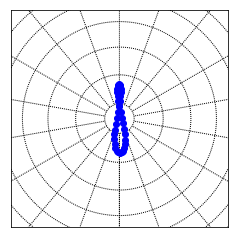

In [22]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt


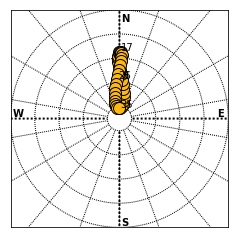

In [224]:
#width = 28000000
width = 20000000
m = Basemap(width=width,height=width,projection='aeqd',
            lat_0=90,lon_0=180,celestial=True,resolution='f')

# draw parallels and meridians.
#m.drawparallels(np.arange(-80.,81.,15.))
#m.drawmeridians(np.arange(-180.,181.,15.))
#m.drawmeridians(np.arange(-180.,181.,90.),linewidth=2,linestyles='_')
m.drawparallels(np.arange(0,91, 20))
m.drawmeridians(np.arange(-180,180,20))
m.drawmeridians(np.arange(-180,180,90),linewidth=2)

ax = plt.gca()
sd_lat, sd_lon = -32, 0
alt,azi,dates = solar_alt_azi(sd_lat,sd_lon)
xpt,ypt = m(azi,alt)
m.plot(xpt,ypt,'ko',\
       color='#FDB813',markeredgecolor='k',\
      markersize=12,
      )

ax = plt.gca()
plt.annotate('N', xy=(0.51, 0.95), xycoords='axes fraction',weight='bold')
plt.annotate('E', xy=(0.95, 0.51), xycoords='axes fraction',weight='bold')
plt.annotate('W', xy=(0.01, 0.51), xycoords='axes fraction',weight='bold')
plt.annotate('S', xy=(0.51, 0.01), xycoords='axes fraction',weight='bold')

#xmin, ymin = m(0, 0)
#xmax, ymax = m(90, 90) 
#ax.set_xlim([xmin, xmax])
#ax.set_ylim([ymin, ymax])

seasons = [8, 17, 26, 35]

for i in seasons:
    x,y = m(azi[i], alt[i])
    plt.annotate(str(i), (x,y),xytext=(1,1),textcoords='offset points')


plt.show()

In [192]:
# summer dates[17]
# winter dates[35]
# spring dates[8]
# fall dates[26]

alt[17]

66.56802095010389

In [268]:
dates

[datetime.datetime(2019, 1, 1, 12, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2019, 2, 1, 12, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2019, 3, 1, 12, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2019, 4, 1, 12, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2019, 5, 1, 12, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2019, 6, 1, 12, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2019, 7, 1, 12, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2019, 8, 1, 12, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2019, 9, 1, 12, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2019, 10, 1, 12, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2019, 11, 1, 12, 0, tzinfo=datetime.timezone.utc),
 datetime.datetime(2019, 12, 1, 12, 0, tzinfo=datetime.timezone.utc)]

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

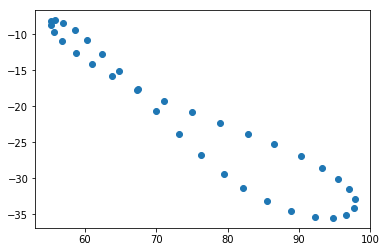

In [14]:
plt.scatter(azi,alt)

In [123]:
dates

['2019-01-01',
 '2019-01-11',
 '2019-01-21',
 '2019-02-01',
 '2019-02-11',
 '2019-02-21',
 '2019-03-01',
 '2019-03-11',
 '2019-03-21',
 '2019-04-01',
 '2019-04-11',
 '2019-04-21',
 '2019-05-01',
 '2019-05-11',
 '2019-05-21',
 '2019-06-01',
 '2019-06-11',
 '2019-06-21',
 '2019-07-01',
 '2019-07-11',
 '2019-07-21',
 '2019-08-01',
 '2019-08-11',
 '2019-08-21',
 '2019-09-01',
 '2019-09-11',
 '2019-09-21',
 '2019-10-01',
 '2019-10-11',
 '2019-10-21',
 '2019-11-01',
 '2019-11-11',
 '2019-11-21',
 '2019-12-01',
 '2019-12-11',
 '2019-12-21']